### Tasca 6A

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import nltk
#download the stopwords from nltk using
nltk.download('stopwords')
#import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = 'sans-serif'


warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/psans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Càrrega de la base de dades prèviament netejada amb l'editor de texte

In [2]:
df = pd.read_csv('movies.csv', sep='::', header=None, engine = 'python')
df.columns =['Name', 'title', 'year', 'genere']
df.drop(['Name'], axis=1, inplace=True)
df.head(20)

,title,year,genere
0,Toy Story,1995,Animation|Children's|Comedy
1,Jumanji,1995,Adventure|Children's|Fantasy
2,Grumpier Old Men,1995,Comedy|Romance
3,Waiting to Exhale,1995,Comedy|Drama
4,Father of the Bride Part II,1995,Comedy
5,Heat,1995,Action|Crime|Thriller
6,Sabrina,1995,Comedy|Romance
7,Tom and Huck,1995,Adventure|Children's
8,Sudden Death,1995,Action
9,GoldenEye,1995,Action|Adventure|Thriller


##### Número de pel•lícules per any

In [3]:
total=df.pivot_table(index = ['year'], aggfunc ='size')
total=total.to_frame().reset_index()
total.columns =['year', 'total']
total

,year,total
0,1919,3
1,1920,2
2,1921,1
3,1922,2
4,1923,3
...,...,...
76,1996,345
77,1997,315
78,1998,337
79,1999,283


In [4]:
generes=df.genere.unique().tolist()
generes

["Animation|Children's|Comedy",
 "Adventure|Children's|Fantasy",
 'Comedy|Romance',
 'Comedy|Drama',
 'Comedy',
 'Action|Crime|Thriller',
 "Adventure|Children's",
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Drama|Romance',
 'Comedy|Horror',
 "Animation|Children's",
 'Drama',
 'Action|Adventure|Romance',
 'Drama|Thriller',
 'Drama|Romance',
 'Thriller',
 'Action|Comedy|Drama',
 'Crime|Drama|Thriller',
 'Drama|Sci-Fi',
 'Romance',
 'Adventure|Sci-Fi',
 'Adventure|Romance',
 "Children's|Comedy|Drama",
 'Documentary',
 'Drama|War',
 'Action|Crime|Drama',
 'Action|Adventure',
 'Crime|Thriller',
 "Animation|Children's|Musical|Romance",
 'Action|Drama|Thriller',
 "Children's|Comedy",
 'Drama|Mystery',
 'Sci-Fi|Thriller',
 'Action|Comedy|Crime|Horror|Thriller',
 'Drama|Musical',
 'Crime|Drama|Romance',
 'Adventure|Drama',
 'Action|Thriller',
 "Adventure|Children's|Comedy|Musical",
 'Action|Drama|War',
 'Action|Adventure|Crime',
 'Crime',
 'Drama|Mystery|Romance',
 'Action|Drama',
 'Drama

##### Simplificació dels gèneres per després incorporar-los per columnes, una per gènere

In [5]:
words=set()
for x in generes:
    y=x.split('|')
    for w in y:
        words.add(w)
words=list(words)
words

["Children's",
 'Thriller',
 'Drama',
 'Animation',
 'Western',
 'Comedy',
 'Romance',
 'Adventure',
 'Horror',
 'Sci-Fi',
 'Crime',
 'Documentary',
 'Musical',
 'Fantasy',
 'Mystery',
 'Film-Noir',
 'War',
 'Action']

In [6]:
for gen in words:
    genere = df['genere']
    df[gen] = genere.str.contains(gen).astype(int)


In [7]:
df.head(50)

,title,year,genere,Children's,Thriller,Drama,Animation,Western,Comedy,Romance,...,Horror,Sci-Fi,Crime,Documentary,Musical,Fantasy,Mystery,Film-Noir,War,Action
0,Toy Story,1995,Animation|Children's|Comedy,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,1995,Adventure|Children's|Fantasy,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Grumpier Old Men,1995,Comedy|Romance,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,1995,Comedy|Drama,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Heat,1995,Action|Crime|Thriller,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,Sabrina,1995,Comedy|Romance,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,Tom and Huck,1995,Adventure|Children's,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Sudden Death,1995,Action,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,GoldenEye,1995,Action|Adventure|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


genere = df['genere']
df['thriller'] = genere.str.contains('Thriller').astype(int)
df['drama'] = genere.str.contains('Drama').astype(int)


In [8]:
df['genere'].describe()

count      3883
unique      301
top       Drama
freq        843
Name: genere, dtype: object

##### Scatter plot amb la llista original de gèneres i anys

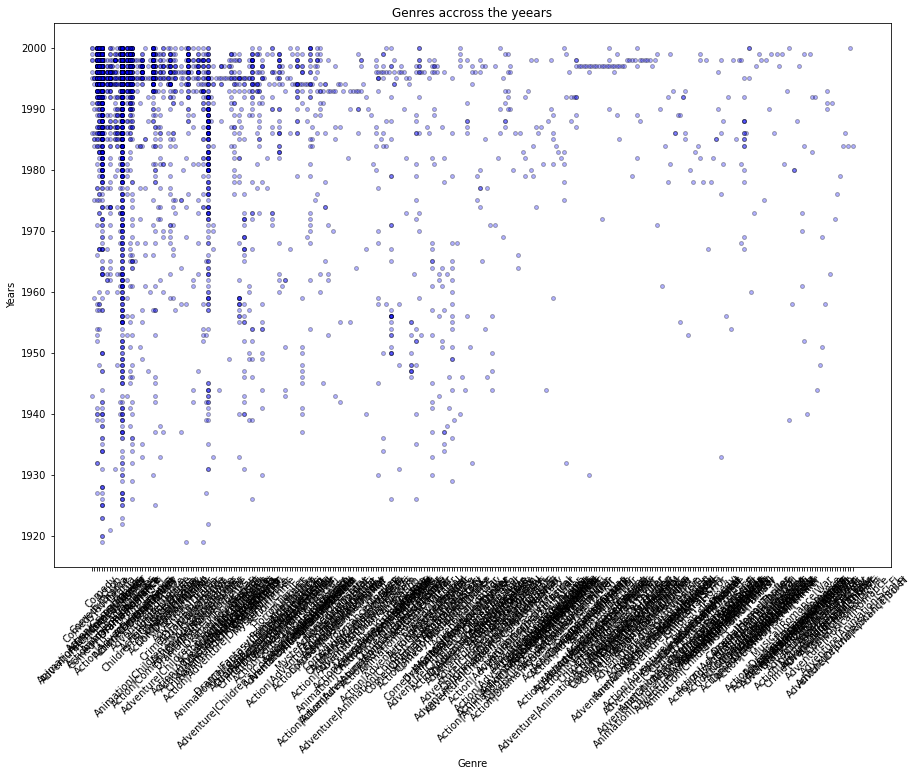

In [9]:
y = df.year
x = df.genere
colors = 'Blue'
area = np.pi*5


# Plot
plt.scatter(x, y, s=area, alpha=0.3, c=colors, edgecolors='black')

plt.title('Genres accross the yeears')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Years')
plt.show()


##### amb aquesta gràfica de stacked bars es pot veure millor l'evoluci´ø dels gèneres per anys

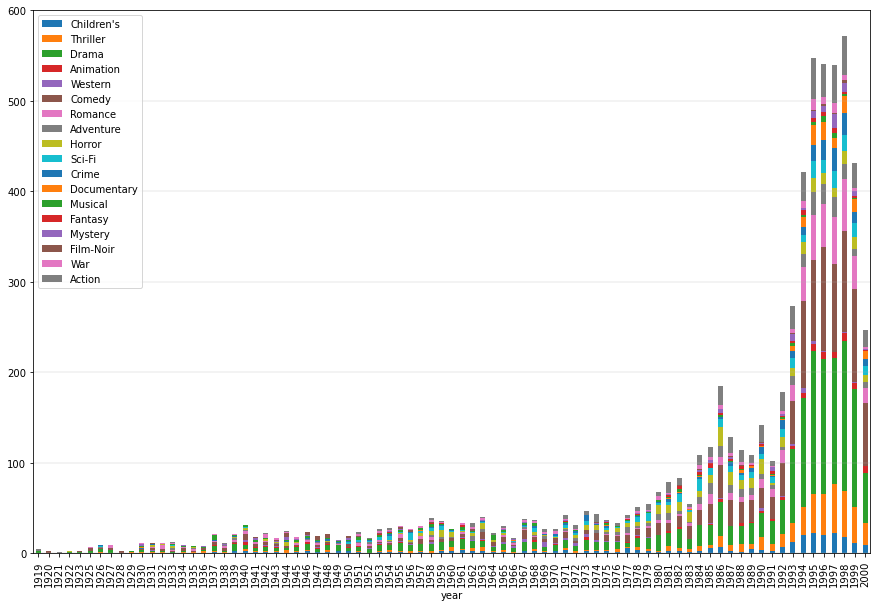

In [10]:
df.groupby('year').sum().plot(kind='bar', stacked=True)
plt.grid(axis = 'y', linewidth = 0.3)

th=df.groupby('year').sum().reset_index()
xx = th.year
yy = th.Thriller
zz=th["Drama"]
vv=th.Western
plt.scatter(xx, yy, alpha=0.3)
plt.scatter(xx, th["Drama"], alpha=0.3)
plt.scatter(xx, th.Western, alpha=0.3)

##### Comparativa entre la distribució dels gèneres i la quantitat de pel•lícules

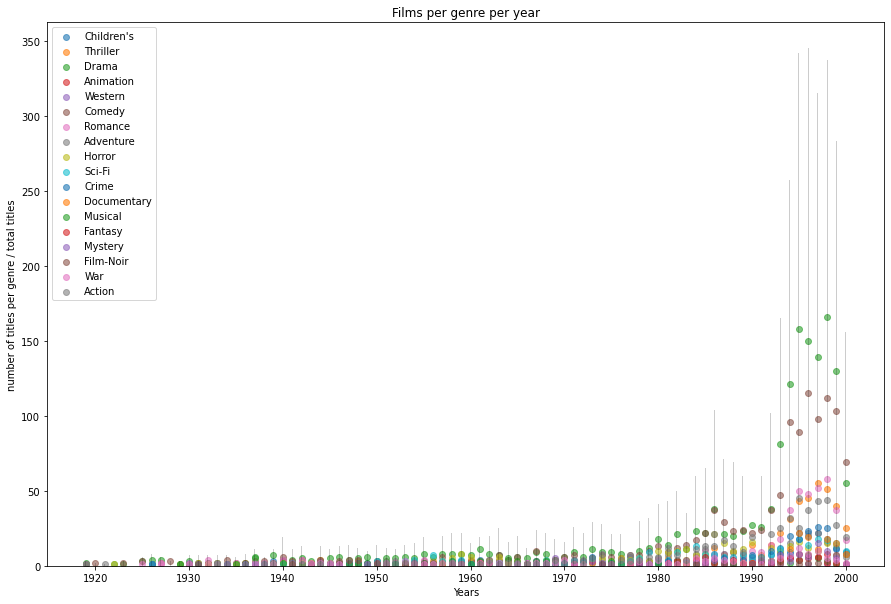

In [11]:
th2=df.groupby('year').sum().reset_index()

#convert 0 to Nan
th = th2.replace(['0', 0], np.nan)

for gen in words:
    y=th[gen]
    plt.scatter(th.year, y, alpha=0.6)
plt.bar(total.year, total.total, alpha=0.2, color='k', width=0.1)
plt.title("Films per genre per year")
plt.xlabel("Years")
plt.ylabel("number of titles per genre / total titles")
plt.legend(words, loc='upper left')


In [12]:
#left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
#display(left_aligned_df)
th

,year,Children's,Thriller,Drama,Animation,Western,Comedy,Romance,Adventure,Horror,Sci-Fi,Crime,Documentary,Musical,Fantasy,Mystery,Film-Noir,War,Action
0,1919.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1920.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1922.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1923.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1996.0,20.0,45.0,150.0,7.0,1.0,115.0,48.0,22.0,12.0,14.0,23.0,19.0,7.0,5.0,6.0,2.0,8.0,37.0
77,1997.0,22.0,55.0,139.0,6.0,NaN,98.0,52.0,22.0,10.0,18.0,26.0,11.0,5.0,6.0,15.0,2.0,10.0,43.0
78,1998.0,18.0,51.0,166.0,8.0,1.0,112.0,58.0,16.0,15.0,17.0,25.0,18.0,3.0,2.0,10.0,3.0,5.0,44.0
79,1999.0,11.0,40.0,130.0,7.0,1.0,103.0,37.0,7.0,14.0,15.0,12.0,15.0,1.0,2.0,5.0,NaN,4.0,27.0


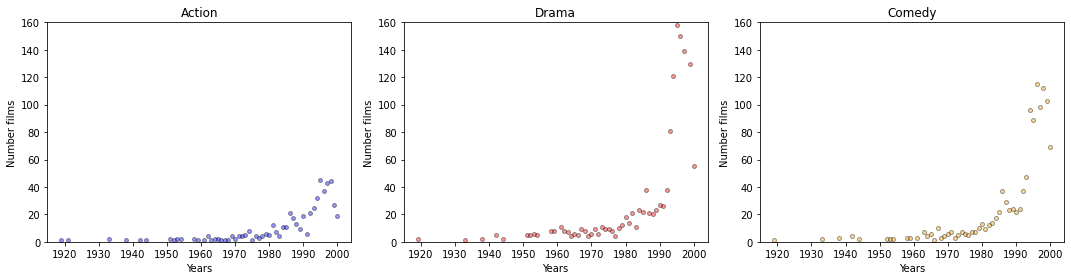

In [13]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(1, 3, 1)
mask = y > 0
# Create data
x = th.year
y = th.Action
colors = 'Blue'

plt.ylim([0, 160])

# Plot
ax1.scatter(x[mask], y[mask], s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Action')
plt.ylabel('Number films')
plt.xlabel('Years')

ax2 = fig.add_subplot(1, 3, 2)
# Create data
x = th.year
y = th.Drama

colors = "Red"

plt.ylim([0, 160])

# Plot
ax2.scatter(x[mask], y[mask], s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Drama')
plt.ylabel('Number films')
plt.xlabel('Years')

ax3 = fig.add_subplot(1, 3, 3)
# Create data
x = th.year
y = th.Comedy

colors = "Orange"
plt.ylim([0, 160])
# Plot


ax3.scatter(x[mask], y[mask], s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Comedy')
plt.ylabel('Number films')
plt.xlabel('Years')




# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

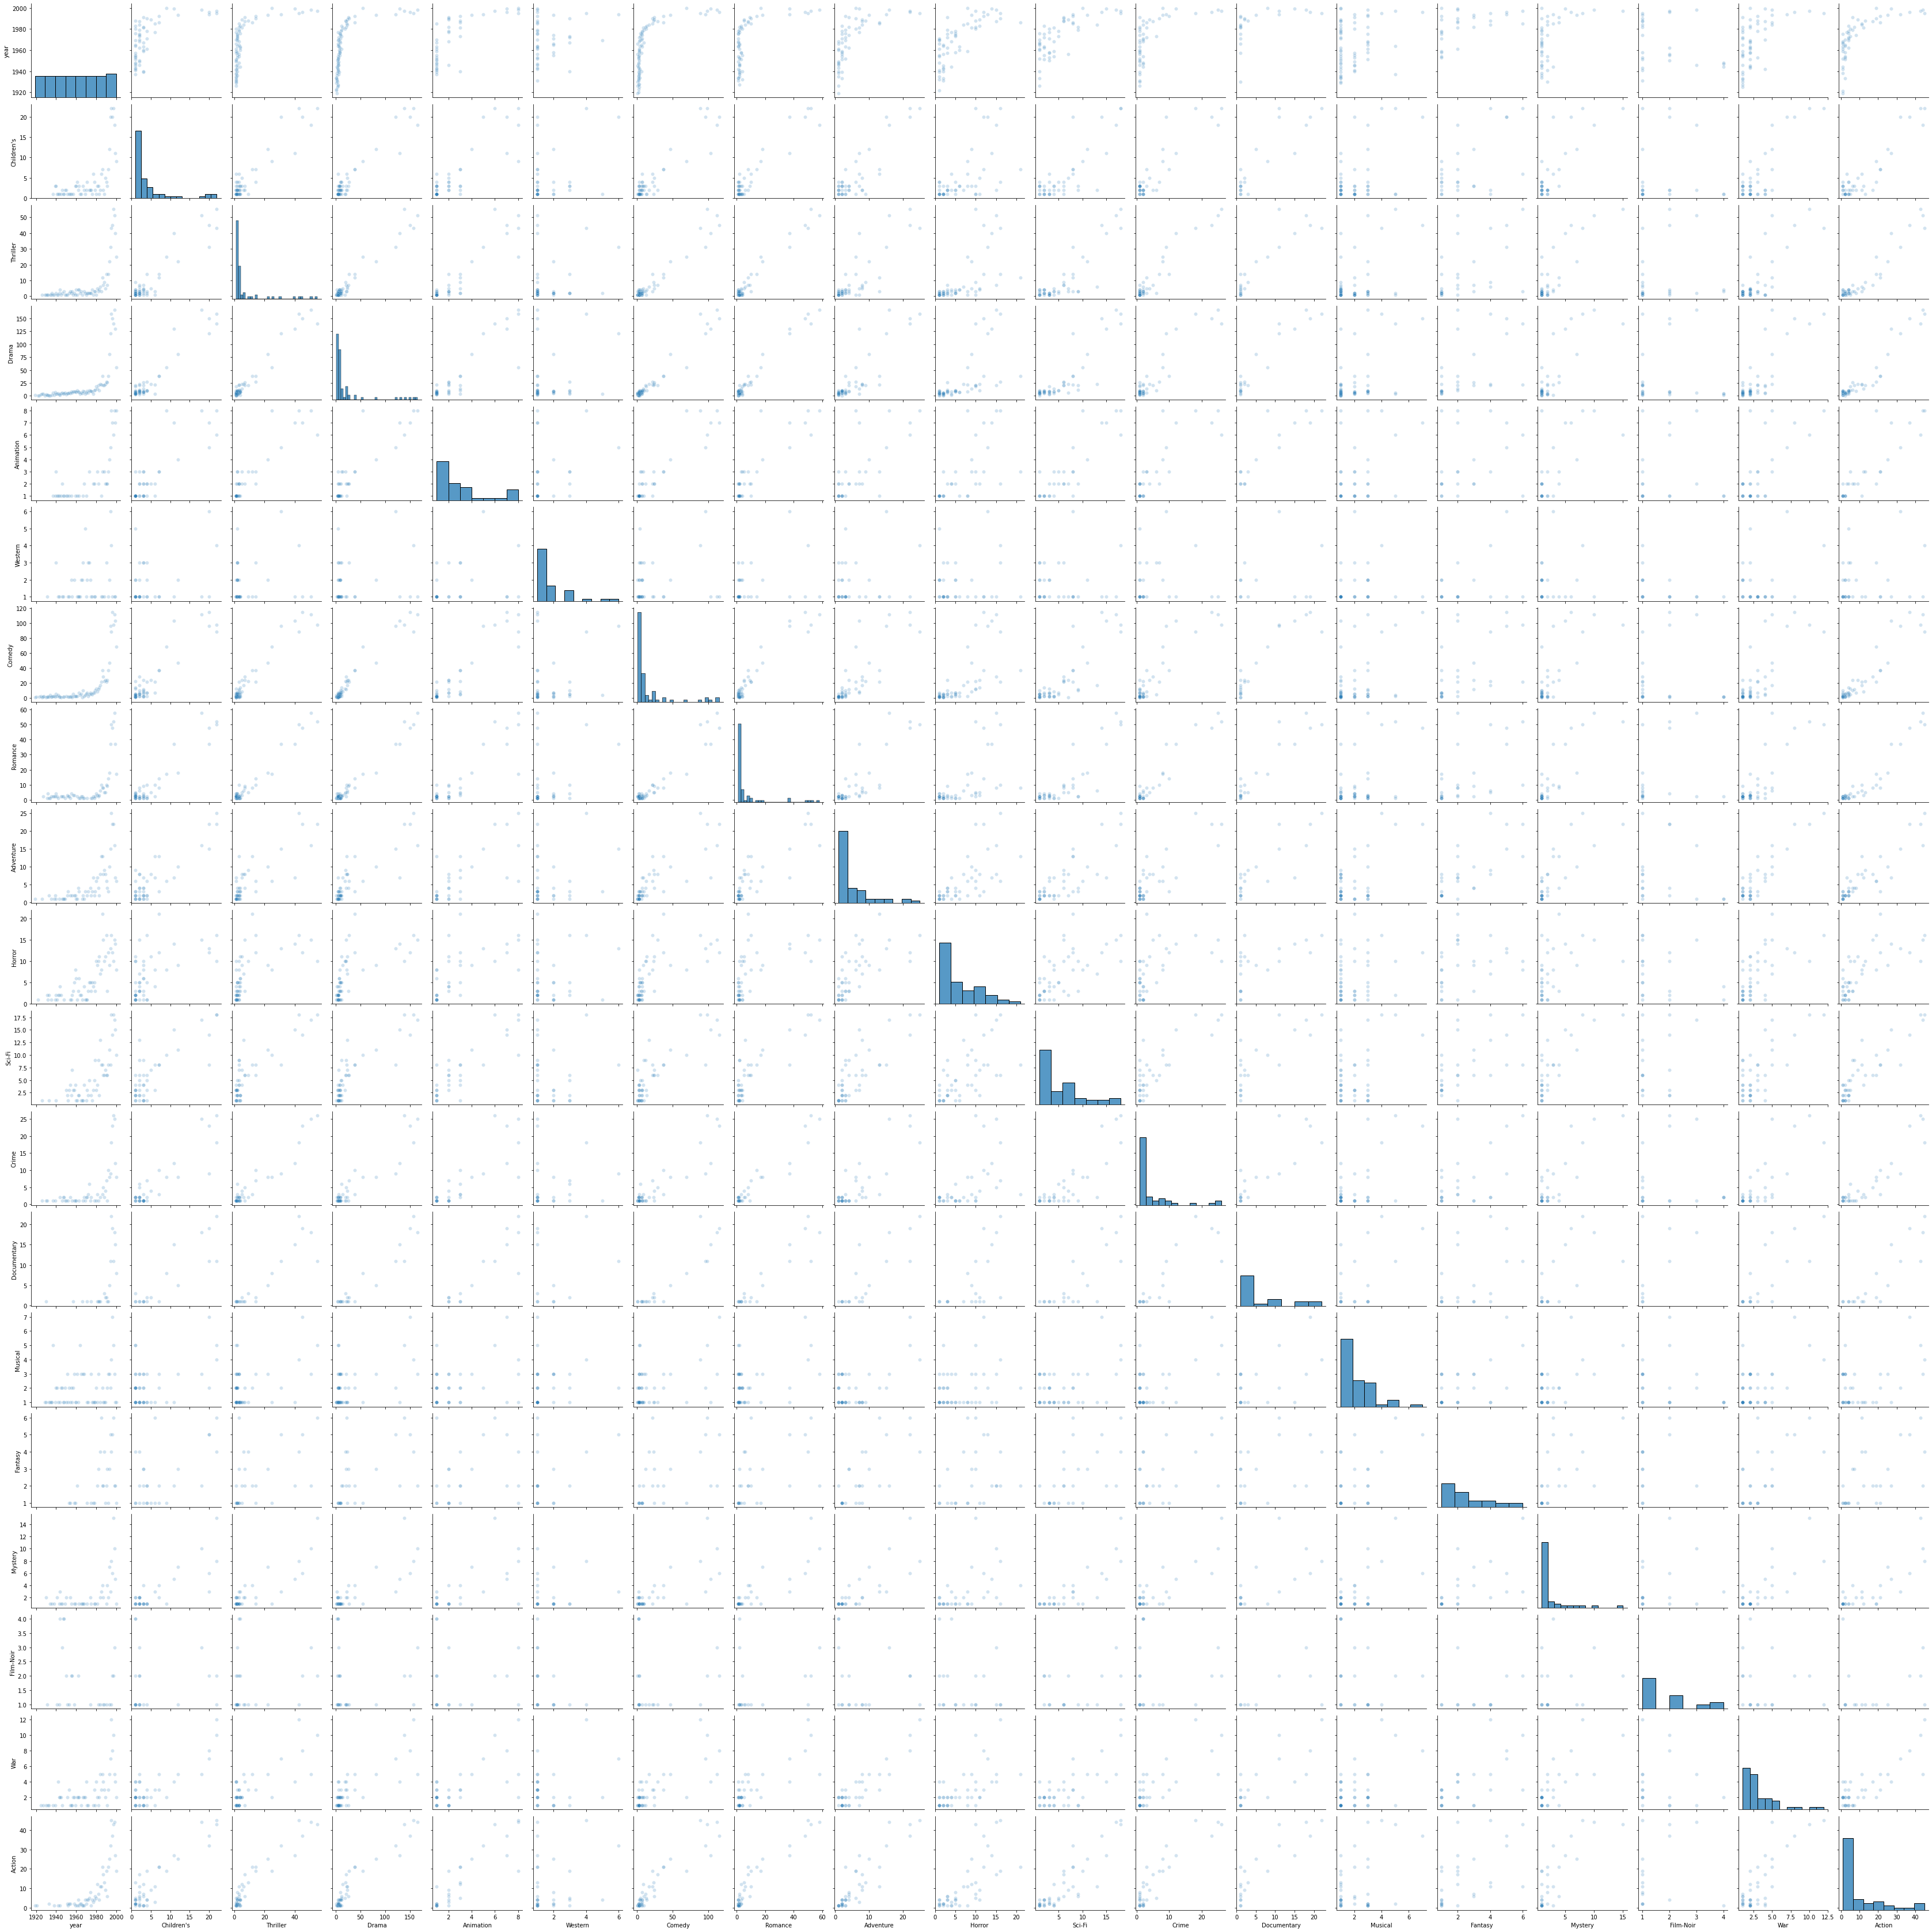

In [14]:
sns.pairplot(th, diag_kind='hist', plot_kws={'alpha': 0.2})

In [15]:
th.describe().round(2)

,year,Children's,Thriller,Drama,Animation,Western,Comedy,Romance,Adventure,Horror,Sci-Fi,Crime,Documentary,Musical,Fantasy,Mystery,Film-Noir,War,Action
count,81.00,57.00,68.00,77.00,40.00,39.00,74.00,57.00,55.00,59.00,51.00,47.00,22.00,59.00,28.00,41.00,25.00,53.00,52.00
mean,1959.94,4.40,7.24,20.82,2.62,1.74,16.22,8.26,5.15,5.81,5.41,4.49,5.77,1.93,2.43,2.59,1.76,2.70,9.67
std,23.63,5.57,12.62,38.37,2.24,1.21,28.35,14.15,5.73,5.01,4.75,6.38,6.97,1.30,1.62,2.91,1.05,2.32,12.22
min,1919.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1940.00,1.00,1.00,4.00,1.00,1.00,2.00,2.00,1.50,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.75
50%,1960.00,2.00,2.00,7.00,2.00,1.00,4.00,2.00,3.00,4.00,4.00,2.00,1.50,1.00,2.00,1.00,1.00,2.00,4.00
75%,1980.00,4.00,4.25,14.00,3.00,2.00,12.75,6.00,7.00,9.50,8.00,4.50,10.25,3.00,3.25,3.00,2.00,3.00,12.25
max,2000.00,22.00,55.00,166.00,8.00,6.00,115.00,58.00,25.00,21.00,18.00,26.00,22.00,7.00,6.00,15.00,4.00,12.00,45.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb090d13a00>]],
      dtype=object)

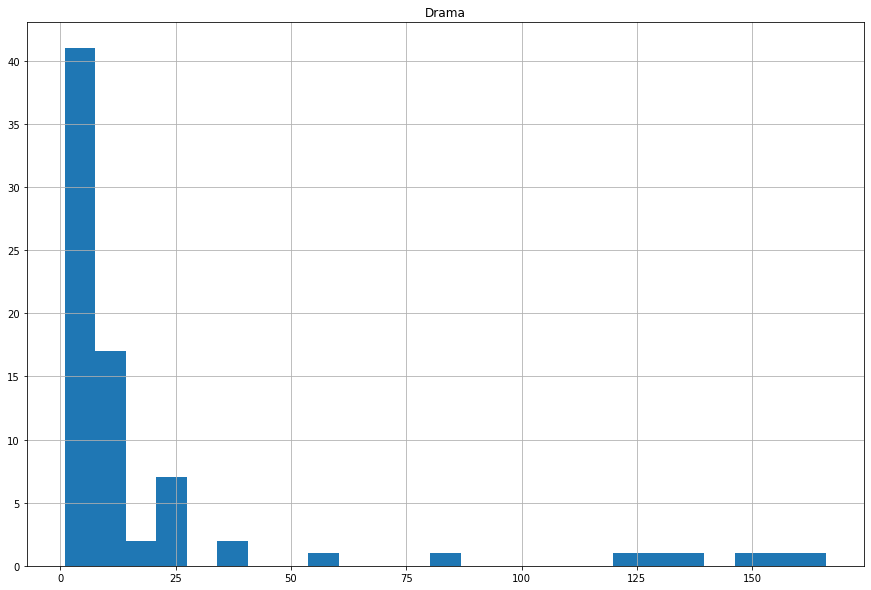

In [16]:
th.hist(['Drama'], bins=25)

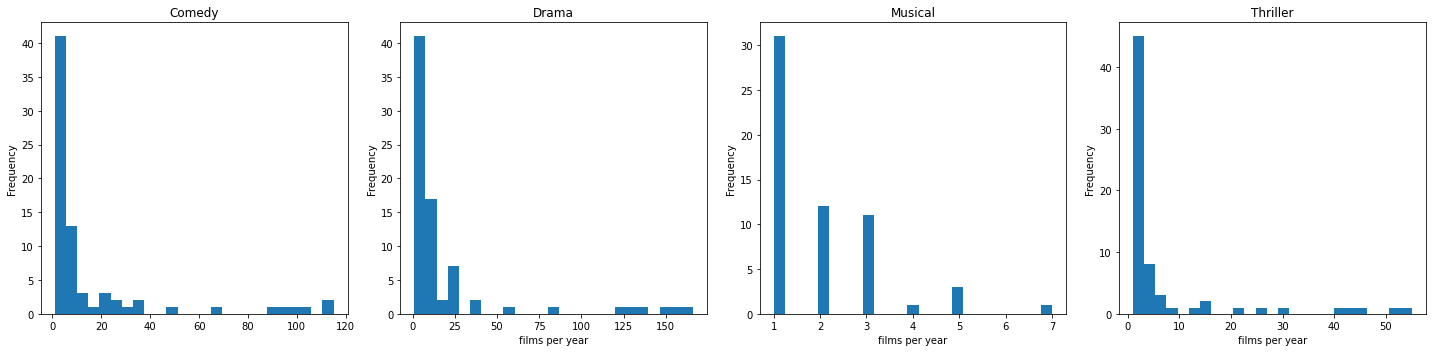

In [17]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 4, 1)

ax1.hist(th['Comedy'], bins=25)
plt.title('Comedy')
plt.ylabel('Frequency')

ax2 = fig.add_subplot(1, 4, 2)

ax2.hist(th['Drama'], bins=25)

plt.title('Drama')
plt.ylabel('Frequency')
plt.xlabel('films per year')

ax3 = fig.add_subplot(1, 4, 3)

ax3.hist(th['Musical'], bins=25)
plt.title('Musical')
plt.ylabel('Frequency')
plt.xlabel('films per year')

ax4 = fig.add_subplot(1, 4, 4)

ax4.hist(th['Thriller'], bins=25)

plt.title('Thriller')
plt.ylabel('Frequency')
plt.xlabel('films per year')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

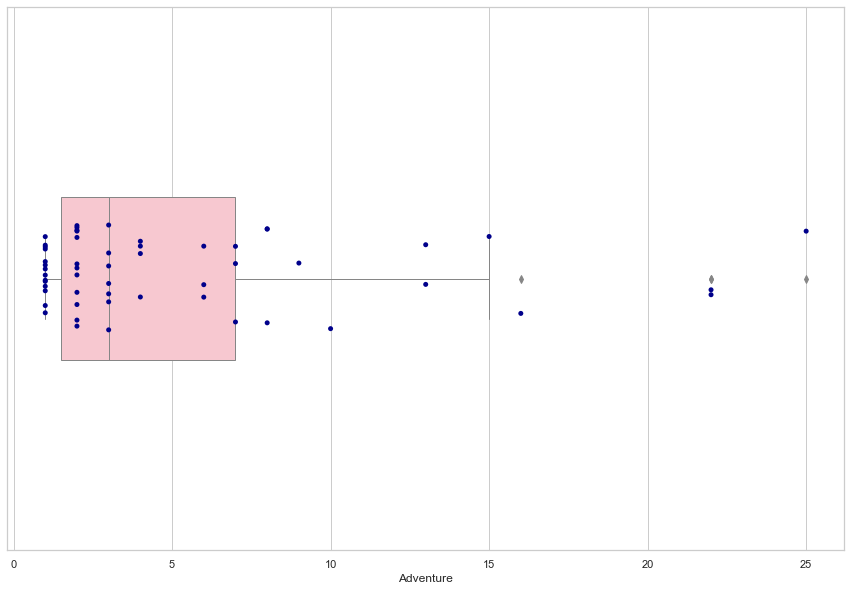

In [18]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=th["Adventure"], color='pink', fliersize=5,  orient='v', linewidth=1 , width=0.3)
sns.stripplot(x=th["Adventure"], orient='v', color='darkblue')

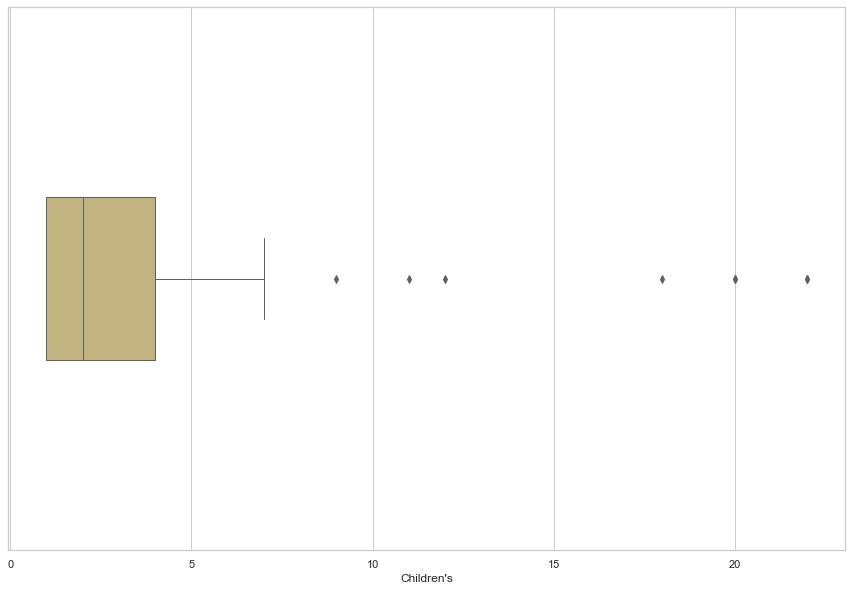

In [19]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=th["Children's"], color='y', fliersize=5,  orient='v', linewidth=1 , width=0.3)

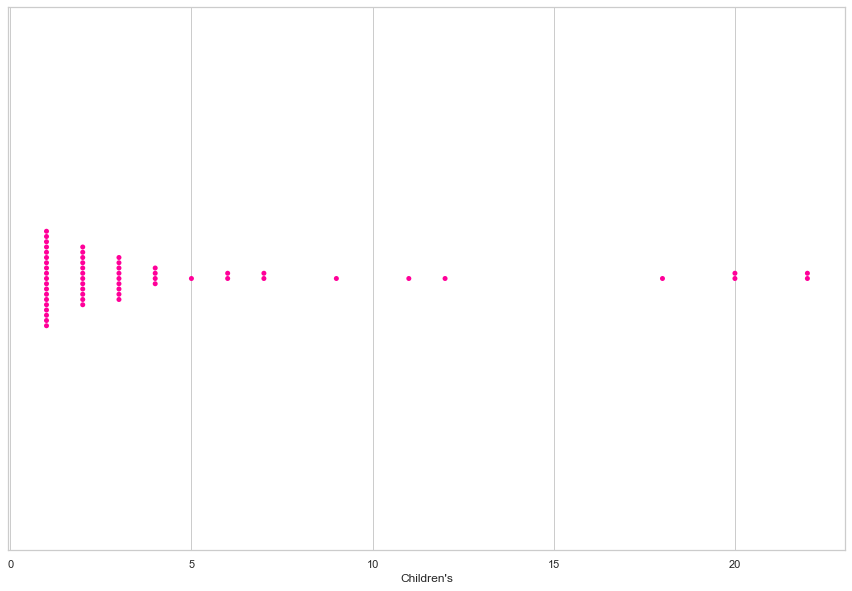

In [20]:
sns.swarmplot(x=th["Children's"], orient='v', color='#ff0099')

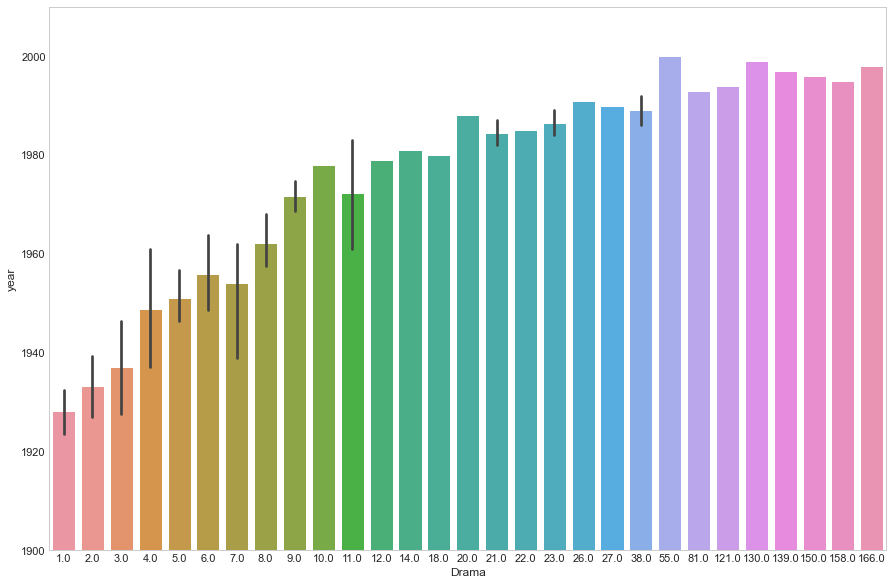

In [268]:
sns.barplot(x='Drama', y='year', data=th, orient="v")

plt.ylim([1900, 2010])
plt.show()

data=pd.DataFrame()
for genre in th4.columns:
    series = th4[th4[genre]==1].apply(np.sum)
    series.rename(genre,inplace=True)
    data=data.append(series)
data

####  Llista de títols

In [269]:
titles=df.title.unique().tolist()
titles

['Toy Story ',
 'Jumanji ',
 'Grumpier Old Men ',
 'Waiting to Exhale ',
 'Father of the Bride Part II ',
 'Heat ',
 'Sabrina ',
 'Tom and Huck ',
 'Sudden Death ',
 'GoldenEye ',
 'American President, The ',
 'Dracula: Dead and Loving It ',
 'Balto ',
 'Nixon ',
 'Cutthroat Island ',
 'Casino ',
 'Sense and Sensibility ',
 'Four Rooms ',
 'Ace Ventura: When Nature Calls ',
 'Money Train ',
 'Get Shorty ',
 'Copycat ',
 'Assassins ',
 'Powder ',
 'Leaving Las Vegas ',
 'Othello ',
 'Now and Then ',
 'Persuasion ',
 'City of Lost Children, The ',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) ',
 'Dangerous Minds ',
 'Twelve Monkeys ',
 'Wings of Courage ',
 'Babe ',
 'Carrington ',
 'Dead Man Walking ',
 'Across the Sea of Time ',
 'It Takes Two ',
 'Clueless ',
 'Cry, the Beloved Country ',
 'Richard III ',
 'Dead Presidents ',
 'Restoration ',
 'Mortal Kombat ',
 'To Die For ',
 'How to Make an American Quilt ',
 'Seven (Se7en) ',
 'Pocahontas ',
 'When Night Is Falling ',
 'Usual S

##### Funció per fer un wordcloud de les paraules dels títols per gènere
Conclusió: molt 'man' i poca 'woman'

In [270]:
#funció Wordcloud

def WordCloud(gen):
    drama_titles = df_nan[df_nan[gen].notnull()]
    titles_drama=drama_titles.title.unique().tolist()
    unique_string=(" ").join(titles_drama).lower()
    unique_string=unique_string.replace('(','').replace(')','')
    stop_words = set(stopwords.words("english"))
    stop_words |= set(['I','le', 'la', 'de','ii','iii','s'])
    from wordcloud import WordCloud
    text = " ".join([word for word in unique_string.split() if word not in stop_words])
    wordcloud = WordCloud(width=800, height=400, max_font_size=300, min_font_size=10
                         , background_color="white",colormap='spring_r').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    


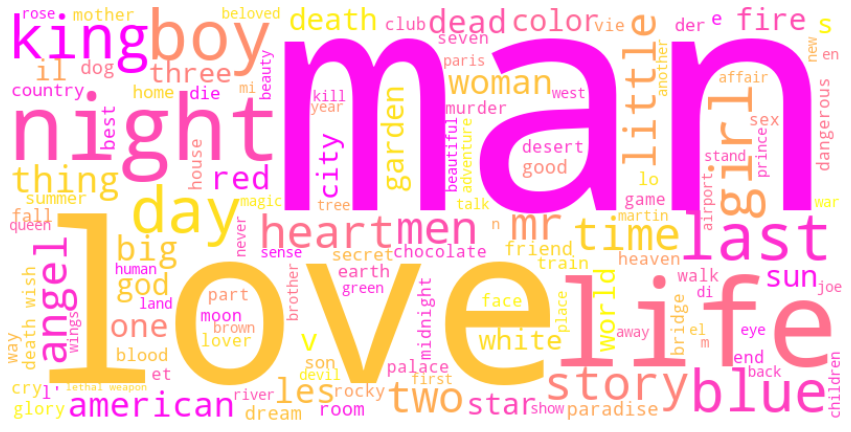

In [271]:
WordCloud('Drama')

In [43]:
thyear=th.set_index('year')
thyear

,Children's,Thriller,Drama,Animation,Western,Comedy,Romance,Adventure,Horror,Sci-Fi,Crime,Documentary,Musical,Fantasy,Mystery,Film-Noir,War,Action
year,,,,,,,,,,,,,,,,,,
1919.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1920.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1922.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996.0,20.0,45.0,150.0,7.0,1.0,115.0,48.0,22.0,12.0,14.0,23.0,19.0,7.0,5.0,6.0,2.0,8.0,37.0
1997.0,22.0,55.0,139.0,6.0,NaN,98.0,52.0,22.0,10.0,18.0,26.0,11.0,5.0,6.0,15.0,2.0,10.0,43.0
1998.0,18.0,51.0,166.0,8.0,1.0,112.0,58.0,16.0,15.0,17.0,25.0,18.0,3.0,2.0,10.0,3.0,5.0,44.0


th['cnt'] = np.ones(len(th))
bin_labels = ['Low (0-100)', 'Medium (100-150)', 'High (150+)']

th['year-group'] = pd.cut(th['year'], [0, 100, 150, th['year'].max()], labels=bin_labels)
g = th.groupby(['year-group', 'Drama']).count()[['cnt']].replace(np.nan, 0).reset_index()
display(g)

In [61]:
stacked = thyear.stack()
stacked1 = pd.DataFrame(stacked).reset_index()
stacked1.columns = ['year', 'genre','count']
stacked1[['year', 'count']] = stacked1[['year', 'count']].astype(int)
stacked1

,year,genre,count
0,1919,Drama,2
1,1919,Comedy,1
2,1919,Adventure,1
3,1919,Action,1
4,1920,Comedy,2
...,...,...,...
899,2000,Musical,1
900,2000,Fantasy,1
901,2000,Mystery,1
902,2000,War,2


##### Intent de fer un heatmap que mostri la quantitat de pel•lícules per gènere i any. Aquesta opció és bastant limitada, no n'he trobat una altra

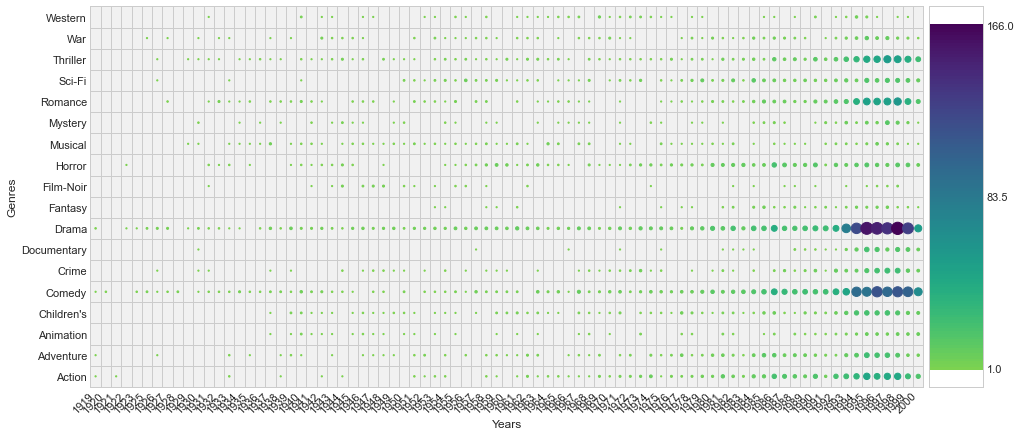

In [138]:
from heatmap import heatmap
fig = plt.figure(figsize=(16,7))
heatmap(
    x=stacked1['year'], # Column to use as horizontal dimension 
    y=stacked1['genre'], # Column to use as vertical dimension
    marker='o',

    size_scale=150, # Change this to see how it affects the plot
    size=stacked1['count'], # Values to map to size, here we use number of items in each bucket
    color=stacked1['count'], # Values to map to color, here we use number of items in each bucket
    palette=sns.color_palette("viridis_r", n_colors=156)[30::],
    xlabel='Years', ylabel='Genres',
)
